In [1]:
def add(u,v):
    return tuple((ui + vi) for (ui,vi) in zip(u,v))

def subtract(u,v):
    return tuple((ui - vi) for (ui,vi) in zip(u,v))

def scale(r,u):
    return [r*ui for ui in u]

def incr(i,x,dx):
    return tuple(x+dx if i==j else x for (j,x) in enumerate(x))

def pseudograd(f,x):
    dx = 1e-4
    grad = [((f(incr(i,x,dx)) - f(incr(i,x,-dx)))/(2*dx)) for i in range(0,len(x))]
    return grad

In [2]:
def sumsq(x):
    return x[0]**2 + x[1]**2

In [3]:
pseudograd(sumsq,(2,2))

[3.9999999999995595, 3.9999999999995595]

In [4]:
def minimize(f,guess=(0,0)):
    learning_rate = 0.1
    step = scale(learning_rate,pseudograd(f, guess))
    nxt = subtract(guess,step)
    if abs(f(nxt)-f(guess)) < 1e-10:
        return nxt
    else:
        return minimize(f,nxt)

In [11]:
minimize(lambda x:x[0]**2+x[1]**2,(1,1))

(9.134385233321176e-06, 9.134385233321176e-06)

In [12]:
def derivative(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

In [13]:
derivative(lambda x:x**3,2)

12.00000001000845

In [14]:
from math import *

In [15]:
def slope_cos(f,x):
    return cos(atan2(derivative(f,x),1))
def slope_sin(f,x):
    return -sin(atan2(derivative(f,x),1))

In [16]:
def speed(ramp,x,initial_position=0):
    return sqrt(2*9.81*(ramp(initial_position)-ramp(x)))

def acceleration(ramp,x):
    return 9.81 * slope_sin(ramp,x)

In [17]:
def linear_ramp(x):
    return 1-x

In [122]:
def descend(ramp,x=0,t=0,endx=1):
    v = (0,0)
    y = ramp(0)
    while x < endx and t < 10.00:
#         print(t,x)
        dt = 1e-4
        mag_dv = (acceleration(ramp,x)*dt)
        dv = scale(mag_dv,(slope_cos(ramp,x), slope_sin(ramp,x)))
        v = add(v,dv)
        vx = v[0]
        dx = vx * dt
        dy = v[1]*dt
        if dx < 0:
            raise Exception('moved backward!',v,dt,dx)
        else:
            x = x+dx
            y = y+dy
            t = t+dt
    return (t,x,y,vx)
        
    

In [123]:
linear_ramp(0)

1

In [124]:
speed(linear_ramp,0)

0.0

In [125]:
acceleration(linear_ramp,0)

6.93671752343965

In [126]:
sqrt(2*9.81) * sqrt(2) / 2

3.1320919526731656

In [127]:
descend(linear_ramp,x=0)

(0.638599999999946, 1.0003105435499888, 2.0003105435499005, 3.1323330000002447)

In [128]:
sqrt(2 * sqrt(2) / (9.81*sin(pi/4)))

0.638550856814101

In [129]:
sqrt(2*9.81)*cos(pi/4)

3.1320919526731656

In [131]:
descend(lambda x:(x-1)**2)

(0.6894999999999404, 1.0000689146556354, 2.6629809970685647, 2.80967845397424)

In [132]:
descend(lambda x:cos(x+1))

(0.6408999999999457, 1.0001844562648343, 1.4416974486768783, 3.128981900483537)

In [133]:
descend(lambda x:2-x)

(0.638599999999946, 1.0003105435499888, 3.000310543549909, 3.1323330000002447)

In [90]:
descend(lambda x:-sin(x))

(0.6395999999999459, 1.0001731666916556, 3.0836369481344845)

In [91]:
def plot_function(xmin,xmax,f):
    xs = np.linspace(xmin,xmax,100)
    ys = [f(x) for x in xs]
    plt.plot(xs,ys)

(1.3638999999998662, 1.000015188403052, 1.155741906882981)

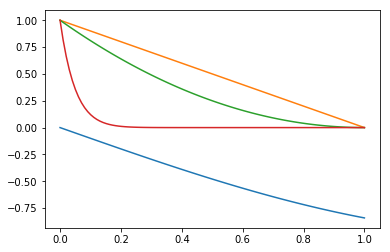

In [120]:
import numpy as np
import matplotlib.pyplot as plt
def circ(x):
    return 1 - sqrt(1-(x-0.99)**2)
plot_function(0,1,lambda x:-sin(x))
plot_function(0,1,lambda x:1-x)
plot_function(0,1,lambda x:(x-1)**2)


plot_function(0,1,lambda x: (x-1)**20)
# descend(circ)
descend(lambda x:(x-1)**20)

In [134]:
sqrt(2*9.81)

4.4294469180700204

$$ d = \int_0^t v(t) \, dt$$
$$ v(t) = v(0) + a\cdot t$$
$$ d = \int_0^t (v(0) + a\cdot t) \, dt $$
$$ d = v(0)\cdot t + \frac{1}{2}at^2$$
$$ d = (v(0) + \frac{1}{2} a t) t$$

$$

In [ ]:
def time(v1,a,distance):
    